In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.dates as mdates

In [2]:
nba_stats = pd.read_csv('https://raw.githubusercontent.com/COGS108/Group055_WI24/master/NBAStats.csv?token=GHSAT0AAAAAACNDSILGD5MQFA2OINPVP2CWZPOKENA')

In [5]:
nba_scandals = pd.read_csv('https://raw.githubusercontent.com/COGS108/Group055_WI24/master/NBA_tweets_2.csv?token=GHSAT0AAAAAACNDSILH74KAGI44SM5LIGGAZPOKHDA')

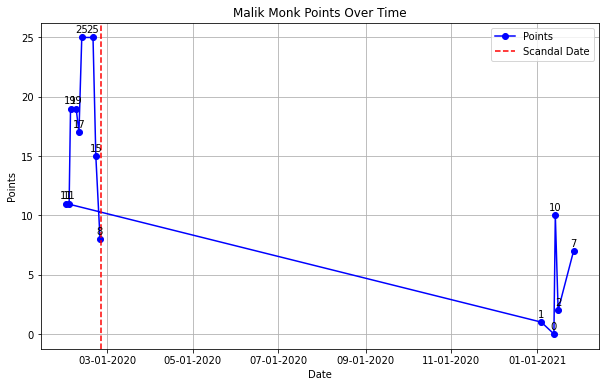

In [12]:
def plot_player_fantasy_points(player_name, nba_stats, scandal_dates=None):
    # Filter data for the specified player
    player_data = nba_stats[nba_stats['Player'] == player_name]

    # Convert Date 
    player_data.loc[:, 'Date'] = pd.to_datetime(player_data.loc[:, 'Date'])

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(player_data['Date'].values, player_data['Points'].values, marker='o', linestyle='-', color='b', label='Points')

    # Check if scandal dates are provided, and plot the vertical lines
    if scandal_dates:
        for scandal_date in scandal_dates:
            scandal_date = pd.to_datetime(scandal_date)
            plt.axvline(x=scandal_date, color='r', linestyle='--', label='Scandal Date')

    # Annotate data points with Fantasy Points values
    for index, row in player_data.iterrows():
        plt.annotate(str(row['Points']),
                     (row['Date'], row['Points']),
                     textcoords="offset points",
                     xytext=(0, 5),
                     ha='center')

    plt.title(f'{player_name} Points Over Time')
    plt.xlabel('Date')
    plt.ylabel('Points')

    # Format X-axis dates as MM-DD-YYYY
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))

    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
scandal_dates = ['2/26/20']
plot_player_fantasy_points('Malik Monk', nba_stats, scandal_dates=scandal_dates)